In [1]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('dark_background')
pd.set_option('float_format', '{:.2f}'.format)

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| VD4005 | Pessoas desalentadas na semana de referência | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



#### Importação e tratamento dos microdados

Importação dos microdados

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'


#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'VD4002', 'VD4003', 'VD4004A','VD4005', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão

# colunas_selecionadas_sup = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
#                         'VD4001', 'VD4002', 'VD4003', 'VD4004A','S01021', #Variáveis de interesse
#                         'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação
                        

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            #if tri == 4:
                #print(ano, tri)
                #globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            #else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
            #if ano == 2021 & tri == 4:
                #print(ano, tri)
                #globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            #else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [3]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])

pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)

In [4]:
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

In [5]:
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4004A': pnadc_completa['VD4004A'],
    'VD4005': pnadc_completa['VD4005'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')

In [6]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

In [89]:
pea = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum') / 1000000
pea_percentual = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum', normalize='index')

In [90]:
pea

VD4001,Pessoas fora da força de trabalho,Pessoas na força de trabalho
ano_tri,,
2019Q4,61.58,107.42
2020Q1,63.16,106.26
2020Q2,72.57,97.28
2020Q3,72.23,98.04
2020Q4,69.04,101.64
2021Q1,68.75,102.34
2021Q2,67.27,104.22
2021Q3,65.46,106.43
2021Q4,64.53,107.76


Gráfico da PEA

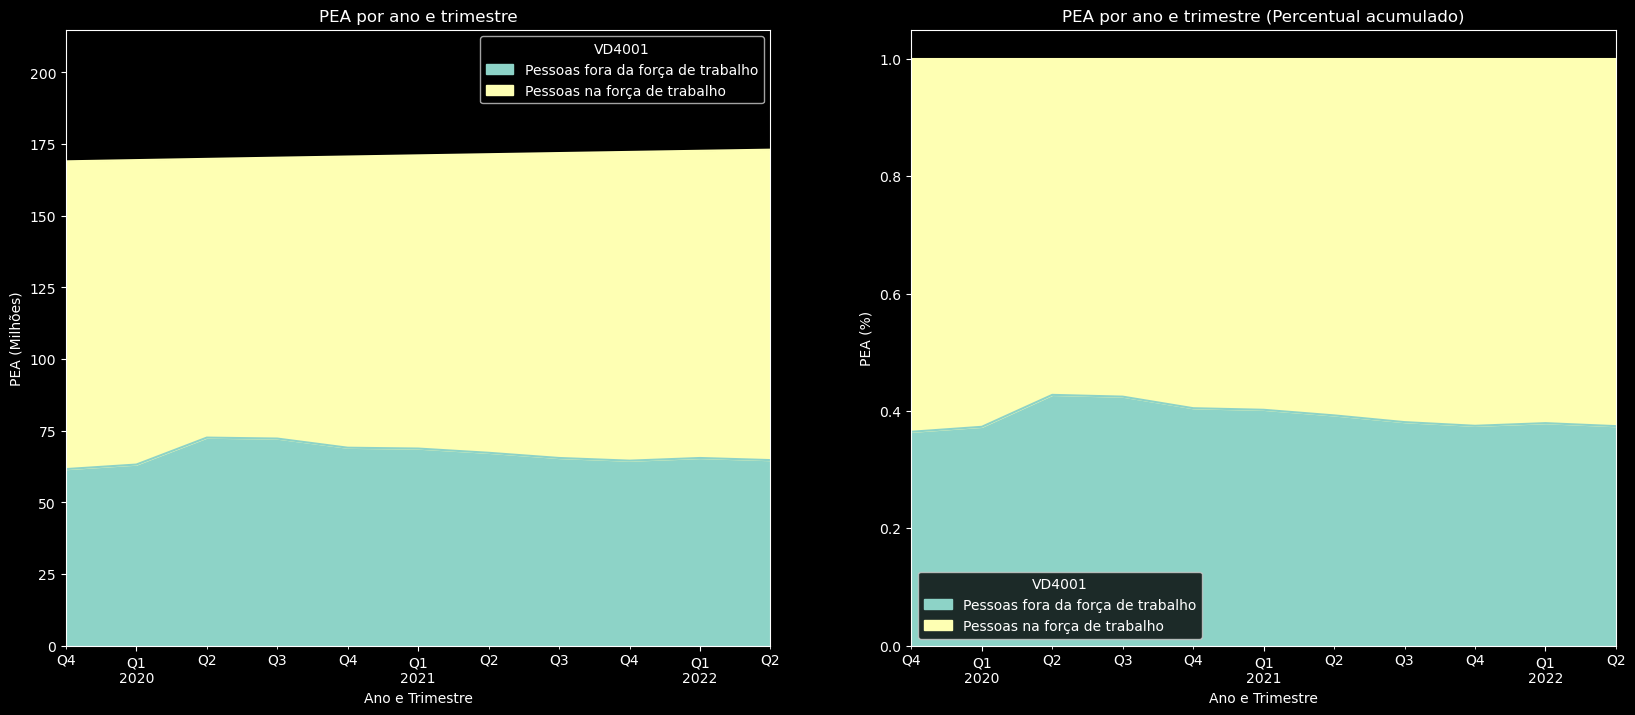

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
pea.plot.area(ax=ax[0], stacked=True, title='PEA por ano e trimestre', xlabel='Ano e Trimestre', ylabel='PEA (Milhões)', legend=True)
ax[0].set_ylim(0, 215)
pea_percentual.plot.area(ax=ax[1], stacked=True, title='PEA por ano e trimestre (Percentual acumulado)', xlabel='Ano e Trimestre', ylabel='PEA (%)', legend=True)
plt.show()

PEA por Estado

In [188]:
pea_forca_trabalho = pnadc_completa[pnadc_completa['VD4001']=='Pessoas na força de trabalho']
pea_fora_forca_trab = pnadc_completa[pnadc_completa['VD4001']=='Pessoas fora da força de trabalho']

In [191]:
pea_fora_forca_trab.head()

,Ano,Trimestre,UPA,UF,V2007,ID,V2010,VD4001,VD4002,VD4003,VD4004A,VD4005,V1027,V1028,V1029,V1033,posest,posest_sxi,ano_tri
1,2019,4,110000016,Rondônia,Mulher,110002034,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e fora da fo...,None,None,98.76,145.63,532471,8485527,111,206,2019Q4
2,2019,4,110000016,Rondônia,Mulher,110002051,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e fora da fo...,None,None,98.76,145.63,532471,9316281,111,204,2019Q4
4,2019,4,110000016,Rondônia,Homem,110002012,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e na força d...,None,None,98.76,134.02,532471,5214819,111,112,2019Q4
6,2019,4,110000016,Rondônia,Mulher,110002032,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e na força d...,None,Pessoas desalentadas,98.76,134.02,532471,8667599,111,207,2019Q4
7,2019,4,110000016,Rondônia,Homem,110002059,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e fora da fo...,None,None,98.76,134.02,532471,9671282,111,104,2019Q4


In [148]:
pea_estado = pd.crosstab(pea_forca_trabalho['ano_tri'] ,[pea_forca_trabalho['UF'], pea_forca_trabalho['VD4001']], values=pea_forca_trabalho['V1028'], aggfunc='sum') / 1000000

In [176]:
pea_estado = pd.DataFrame(pea_estado.unstack()).reset_index().drop('VD4001', axis=1)

In [178]:
pea_estado.columns = ['UF', 'ano_tri', 'Pessoas na força de trabalho']

In [185]:
pea_estado.set_index('ano_tri', inplace=True)

In [187]:
pea_estado

,UF,Pessoas na força de trabalho
ano_tri,,
2019Q4,Acre,0.35
2020Q1,Acre,0.34
2020Q2,Acre,0.34
2020Q3,Acre,0.33
2020Q4,Acre,0.36
...,...,...
2021Q2,Tocantins,0.74
2021Q3,Tocantins,0.76
2021Q4,Tocantins,0.77


c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axis

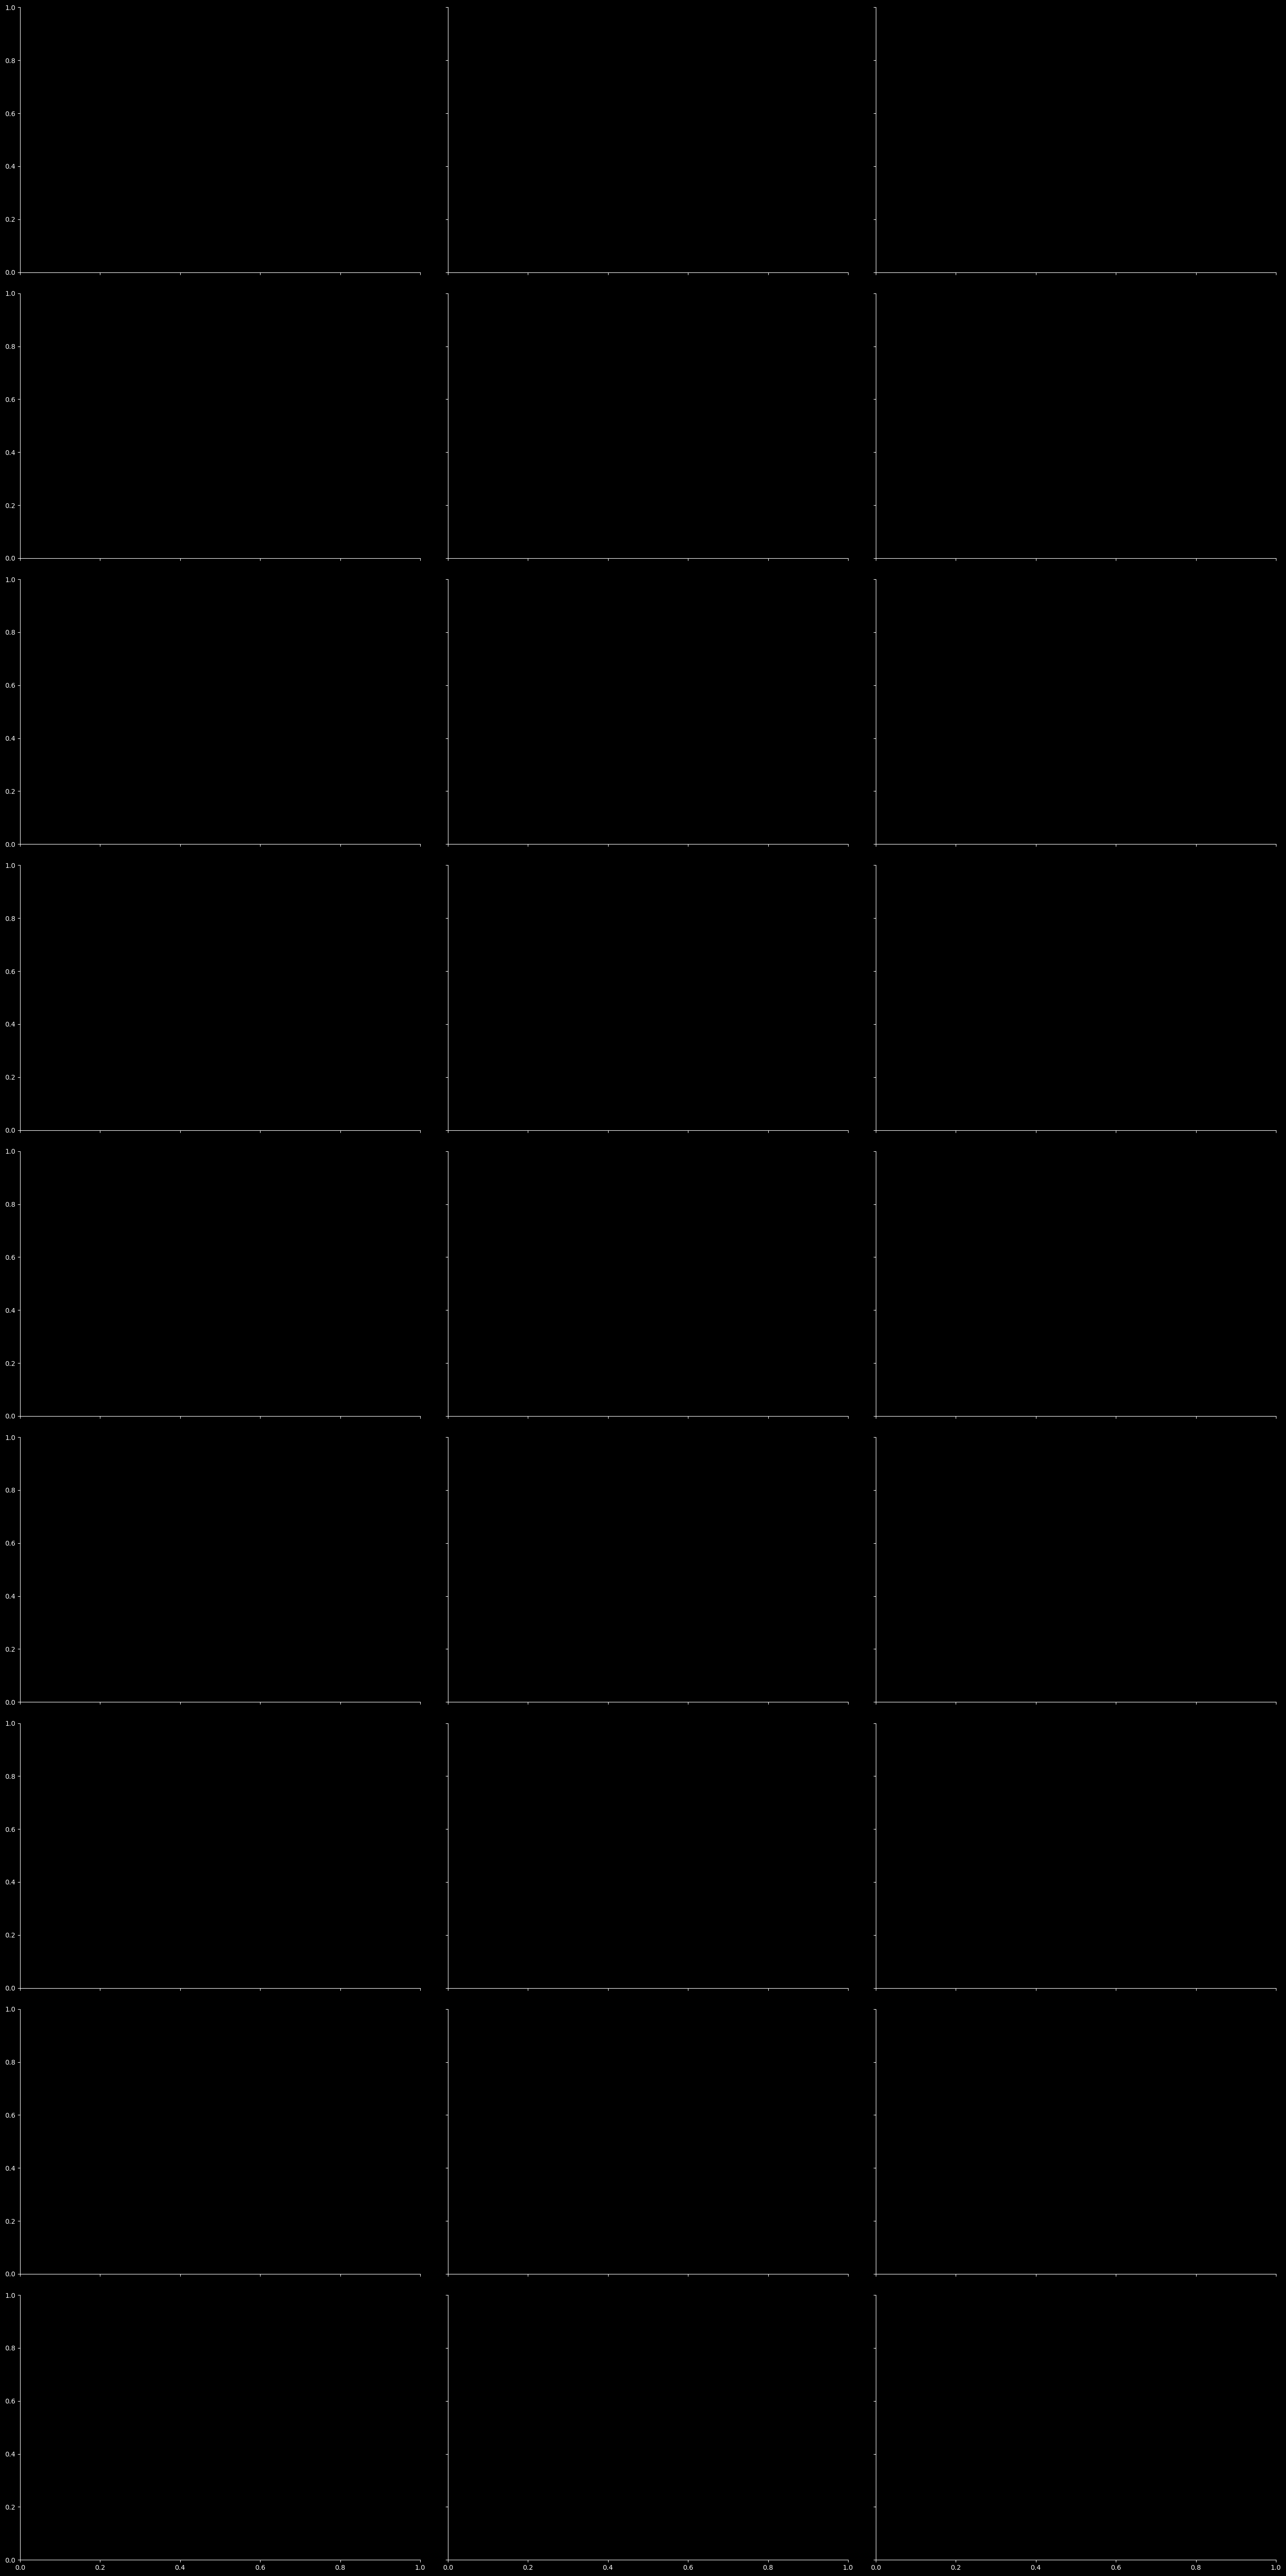

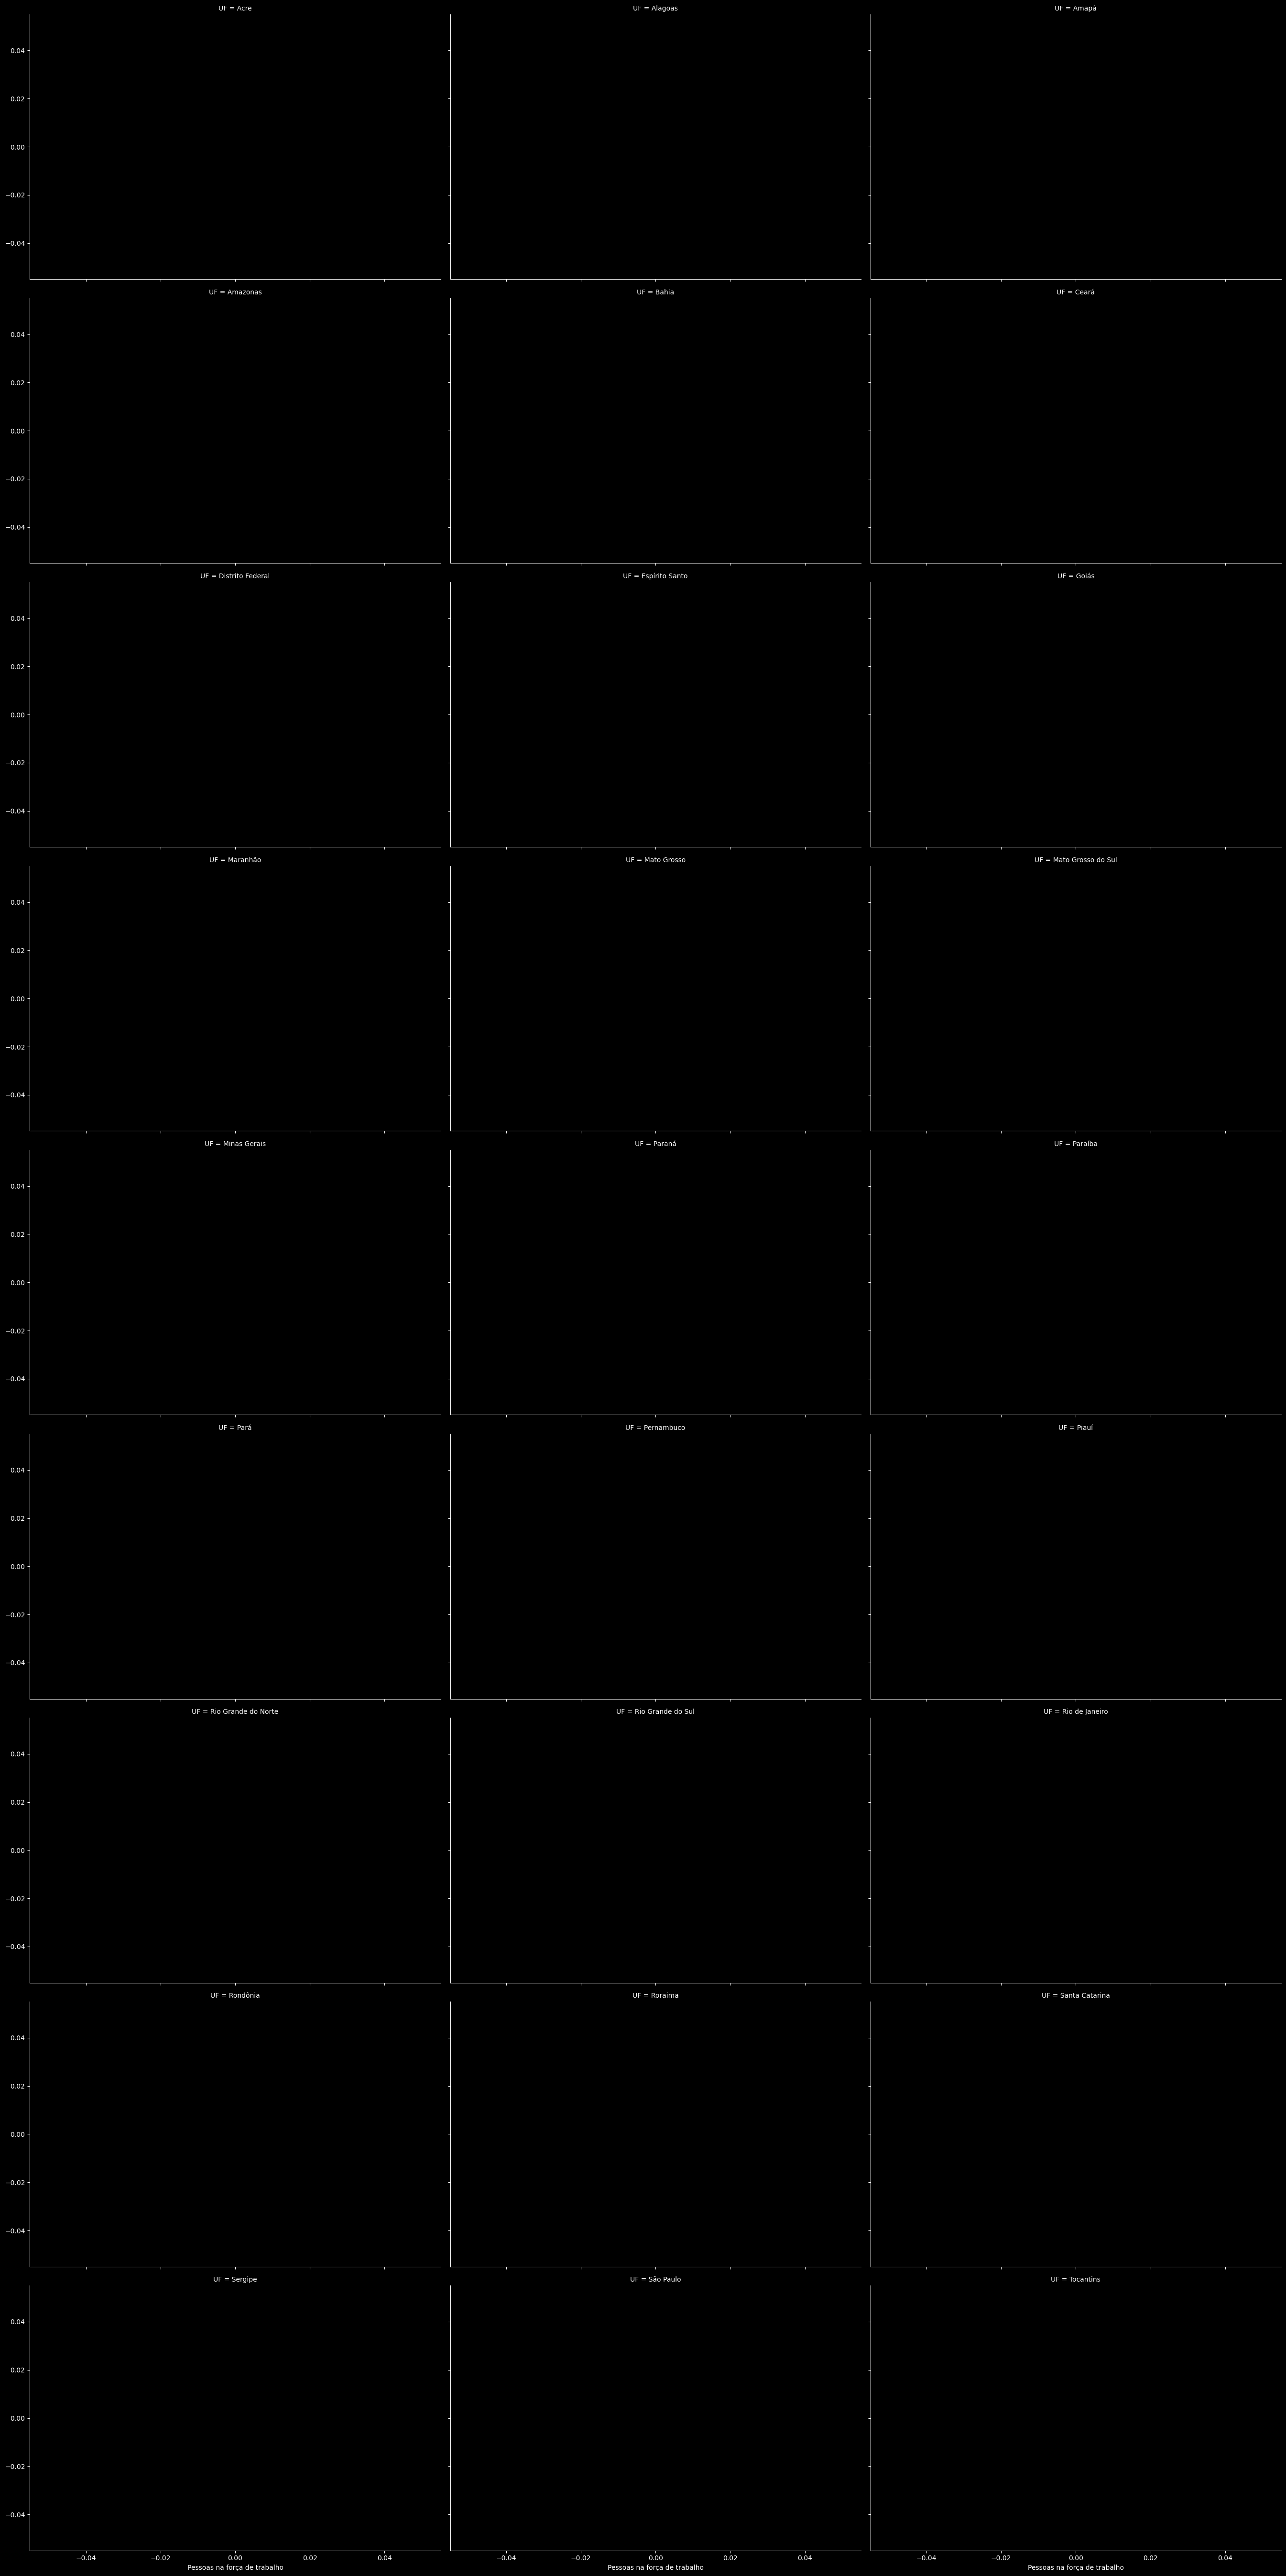

In [193]:
#plot a facetgrid com o gráfico de linha para cada estado.

g = sns.FacetGrid(pea_estado, col='UF', col_wrap=3, height=6, aspect=1.5)
g.map(sns.lineplot, 'Pessoas na força de trabalho')
# g.set_titles('{col_name}')
# g.set_axis_labels('Ano e Trimestre', 'PEA (Milhões)')
# g.set(xlim=('2010Q1', '2020Q2'))
# g.set(ylim=(0, 20))
# g.fig.suptitle('PEA por ano e trimestre por estado', y=1.05)
plt.show()


In [131]:
pea_estado.transpose()

ano_tri                                                2019Q4  2020Q1  2020Q2  \
UF                  VD4001                                                      
Acre                Pessoas fora da força de trabalho    0.30    0.31    0.31   
                    Pessoas na força de trabalho         0.35    0.34    0.34   
Alagoas             Pessoas fora da força de trabalho    1.41    1.36    1.46   
                    Pessoas na força de trabalho         1.19    1.22    1.11   
Amapá               Pessoas fora da força de trabalho    0.23    0.24    0.29   
                    Pessoas na força de trabalho         0.39    0.39    0.34   
Amazonas            Pessoas fora da força de trabalho    1.08    1.10    1.31   
                    Pessoas na força de trabalho         1.90    1.91    1.75   
Bahia               Pessoas fora da força de trabalho    4.78    4.76    5.75   
                    Pessoas na força de trabalho         7.03    7.08    6.13   
Ceará               Pessoas fora da força de trabalho    3.07    3.18    3.72   
                    Pessoas na força de trabalho         4.23    4.14    3.60   
Distrito Federal    Pessoas fora da força de trabalho    0.79    0.81    0.93   
                    Pessoas na força de trabalho         1.67    1.68    1.55   
Espírito Santo      Pessoas fora da força de trabalho    1.06    1.08    1.24   
                    Pessoas na força de trabalho         2.18    2.16    2.02   
Goiás               Pessoas fora da força de trabalho    1.80    1.88    2.17   
                    Pessoas na força de trabalho         3.84    3.77    3.51   
Maranhão            Pessoas fora da força de trabalho    2.69    2.73    3.00   
                    Pessoas na força de trabalho         2.66    2.64    2.38   
Mato Grosso         Pessoas fora da força de trabalho    0.85    0.85    0.93   
                    Pessoas na força de trabalho         1.82    1.84    1.78   
Mato Grosso do Sul  Pessoas fora da força de trabalho    0.71    0.73    0.80   
                    Pessoas na força de trabalho         1.43    1.41    1.33   
Minas Gerais        Pessoas fora da força de trabalho    5.92    6.11    6.80   
                    Pessoas na força de trabalho        11.46   11.29   10.51   
Paraná              Pessoas fora da força de trabalho    3.09    3.14    3.31   
                    Pessoas na força de trabalho         6.12    6.08    6.00   
Paraíba             Pessoas fora da força de trabalho    1.48    1.49    1.67   
                    Pessoas na força de trabalho         1.69    1.67    1.48   
Pará                Pessoas fora da força de trabalho    2.67    2.66    3.04   
                    Pessoas na força de trabalho         3.88    3.87    3.55   
Pernambuco          Pessoas fora da força de trabalho    3.38    3.60    4.06   
                    Pessoas na força de trabalho         4.25    4.13    3.59   
Piauí               Pessoas fora da força de trabalho    1.09    1.12    1.37   
                    Pessoas na força de trabalho         1.50    1.43    1.21   
Rio Grande do Norte Pessoas fora da força de trabalho    1.25    1.22    1.47   
                    Pessoas na força de trabalho         1.53    1.57    1.37   
Rio Grande do Sul   Pessoas fora da força de trabalho    3.12    3.20    3.65   
                    Pessoas na força de trabalho         6.27    6.20    5.81   
Rio de Janeiro      Pessoas fora da força de trabalho    5.52    5.65    6.59   
                    Pessoas na força de trabalho         9.01    8.94    8.05   
Rondônia            Pessoas fora da força de trabalho    0.50    0.50    0.56   
                    Pessoas na força de trabalho         0.88    0.89    0.82   
Roraima             Pessoas fora da força de trabalho    0.14    0.15    0.17   
                    Pessoas na força de trabalho         0.26    0.25    0.23   
Santa Catarina      Pessoas fora da força de trabalho    1.92    2.01    2.18   
                    Pessoas na 

c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\est.matheus.brasil\Anaconda3\lib\site-packages\seaborn\axis

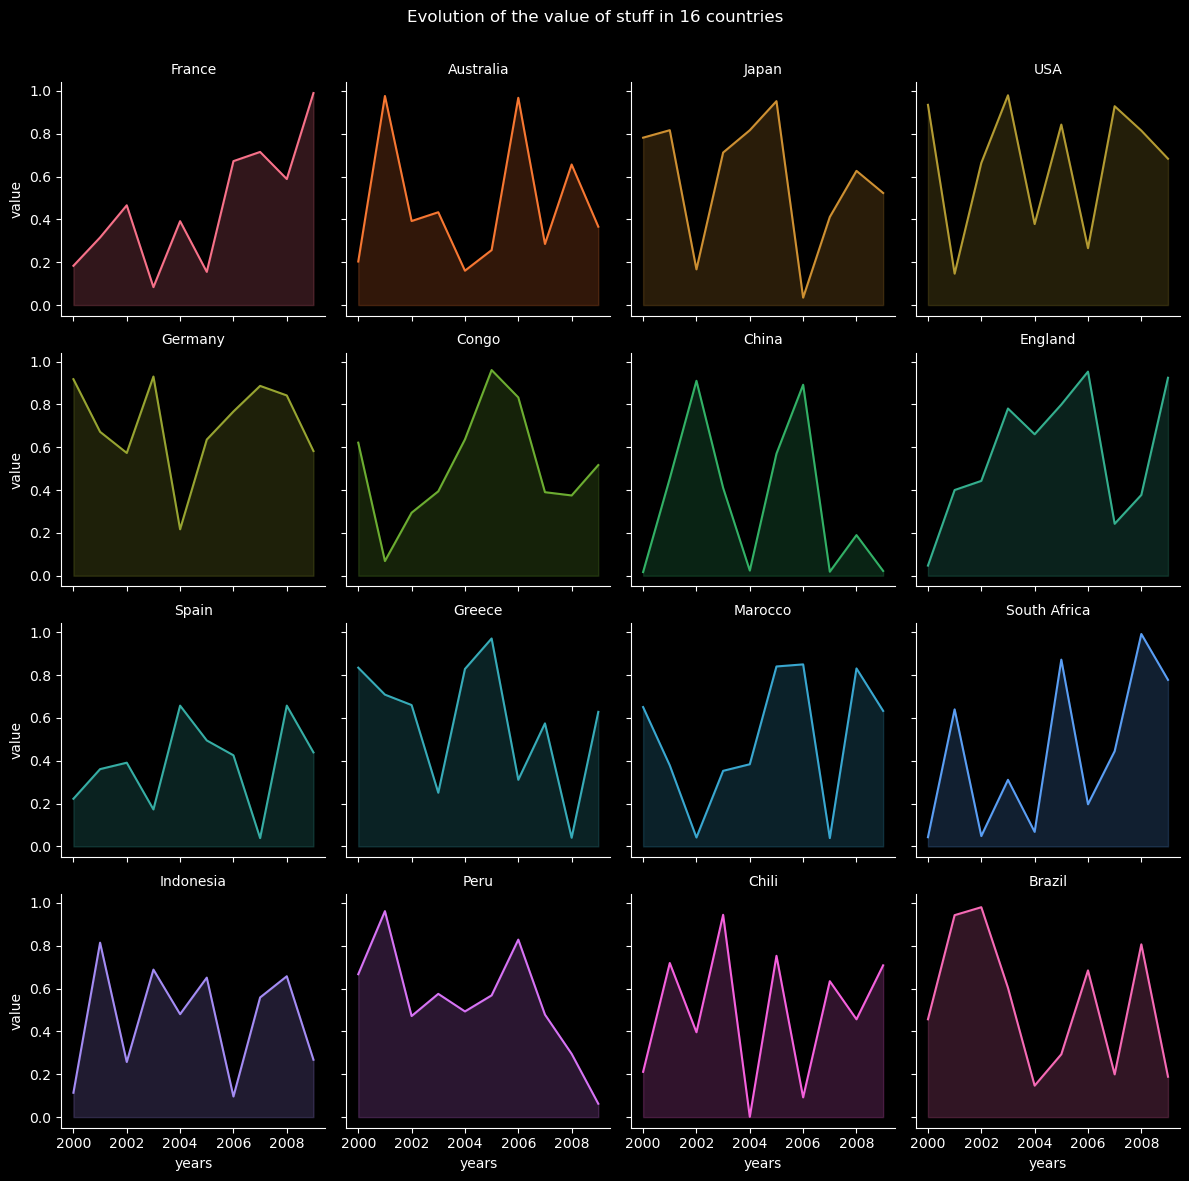

In [124]:
# Create a grid : initialize it
g = sns.FacetGrid(df, col='country', hue='country', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'years', 'value')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'years', 'value', alpha=0.2).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')

# Show the graph
plt.show()

In [114]:
pd.crosstab(pnadc_completa['ano_tri'], [pnadc_completa['VD4001'], pnadc_completa['VD4002']], values=pnadc_completa['V1028'], aggfunc='sum')

VD4001  Pessoas na força de trabalho                 
VD4002           Pessoas desocupadas Pessoas ocupadas
ano_tri                                              
2019Q4                   11902662.68      95514997.13
2020Q1                   13147927.78      93114584.55
2020Q2                   13228404.89      84050907.36
2020Q3                   14597503.44      83439420.08
2020Q4                   14411542.28      87225343.84
2021Q1                   15256839.81      87082018.50
2021Q2                   14831515.72      89384334.98
2021Q3                   13453389.81      92976445.62
2021Q4                   12010635.92      95747457.85
2022Q1                   11949047.48      95275255.91
2022Q2                   10080109.51      98268976.77

Fluxo de desemprego

In [ ]:
fluxo1 = pnadc_completa[(pnadc_completa['ano_tri']=='2019Q4')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxo2 = pnadc_completa[(pnadc_completa['ano_tri']=='2020Q1')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxos = pd.merge(fluxo1, fluxo2, on='ID', how='inner')
fluxos.columns = ['ID', 'VD4002 2019', 'VD4002 2020']

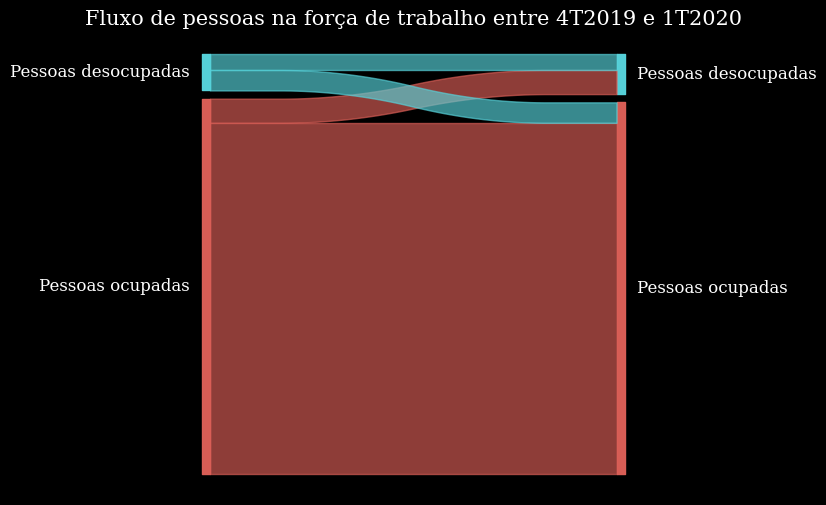

In [ ]:
from pySankey.sankey import sankey


sankey(fluxos["VD4002 2019"], fluxos["VD4002 2020"], aspect=20, fontsize=12, )
plt.title('Fluxo de pessoas na força de trabalho entre 4T2019 e 1T2020', fontsize=15)
plt.show()

In [ ]:
pnadc_completa.groupby(['VD4001'])['VD4001'].count()

VD4001
Pessoas fora da força de trabalho    1661351
Pessoas na força de trabalho         2135557
Name: VD4001, dtype: int64

In [ ]:
pnadc_completa.groupby(['VD4002'])['VD4002'].count()

VD4002
Pessoas desocupadas     246509
Pessoas ocupadas       1889048
Name: VD4002, dtype: int64

In [ ]:
pnadc_completa.groupby(['VD4003'])['VD4003'].count()

VD4003
Pessoas fora da força de trabalho e fora da força de trabalho potencial    1409141
Pessoas fora da força de trabalho e na força de trabalho potencial          252210
Name: VD4003, dtype: int64

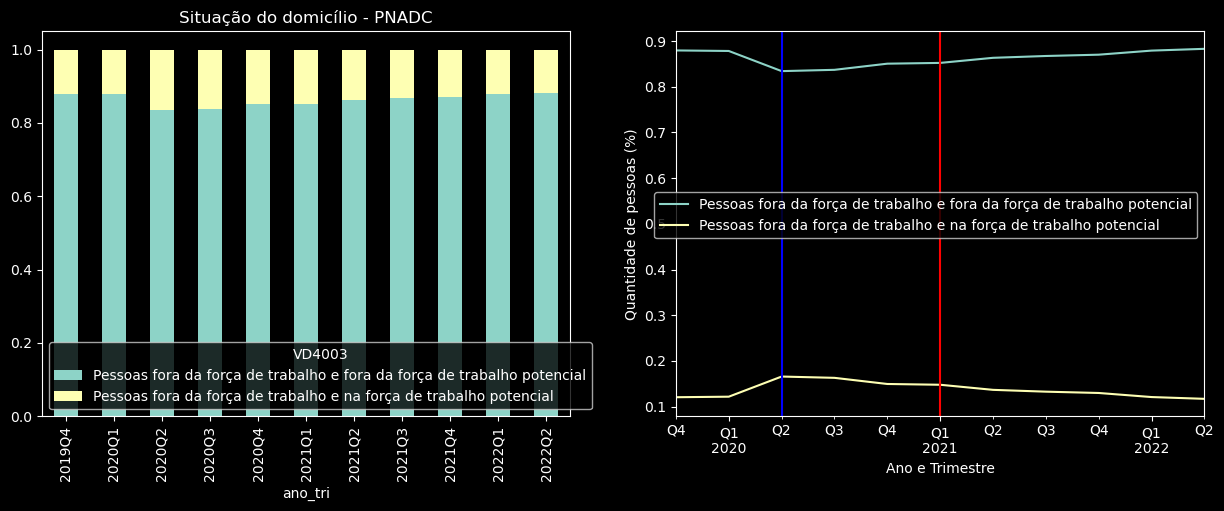

In [ ]:
forca_potencial_expandida = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['VD4003'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index')                            

fig, ax = plt.subplots(1, 2, figsize=(15,5))

forca_potencial_expandida.plot(ax=ax[0], kind='bar', stacked=True, title='Situação do domicílio - PNADC')

forca_potencial_expandida.plot(ax=ax[1])

plt.legend(bbox_to_anchor=(1, 0.6), loc='upper right', prop={'size': 10})
plt.axvline(x = '2020Q2', color = 'b', label = 'Início do Lockdown no Brasil')
plt.axvline(x = '2021Q1', color = 'r', label = 'Início da vacinação no Brasil')
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (%)')

plt.show()
